In [159]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
from PIL import Image
import PIL
import pandas as pd
import numpy as np

In [160]:
# load data
xls = pd.ExcelFile('English_combined_response.xlsx')

In [161]:
# correct the path names (change directory as well as select filters instead of actual stimuli)
def correctPathName(oldPathName):
    temp1 = oldPathName.replace('10/', '', 1)
    temp2 = temp1.replace('.png', '', 1)
    
    for char in ('A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'):
        if char in oldPathName:
            return temp2.replace(char+'/', '', 1)

In [162]:
def prepareDataframeForParticipant(participantIndex, numBubbles):
    df = pd.read_excel(xls, 'P{}_{}'.format(participantIndex, numBubbles))[['FilePath', 'Correct', 'key_resp33.keys', 'Evaluate']]
    df['FilePath'] = df['FilePath'].apply(correctPathName)
    
    return df

In [163]:
def loadImage(path, resize=False):
    img = Image.open(path)
    img.load()
    if resize == True:
        img_resized = img.resize((32, 32), resample = PIL.Image.LANCZOS)
    else:
        img_resized = img
    img_data = np.asarray(img_resized)
    
    return img_data

In [164]:
import numpy as np
import scipy.stats

def getConfidenceIntervalThreshold(data, confidence=0.95):
    a = 1.0 * np.array(data).flatten()
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m+h

number of images in all filters:  200
number of images in all filters:  200
number of images in all filters:  200
number of images in all filters:  200
number of images in all filters:  200
number of images in all filters:  200
number of images in all filters:  200
number of images in all filters:  200
number of images in all filters:  200
number of images in all filters:  200


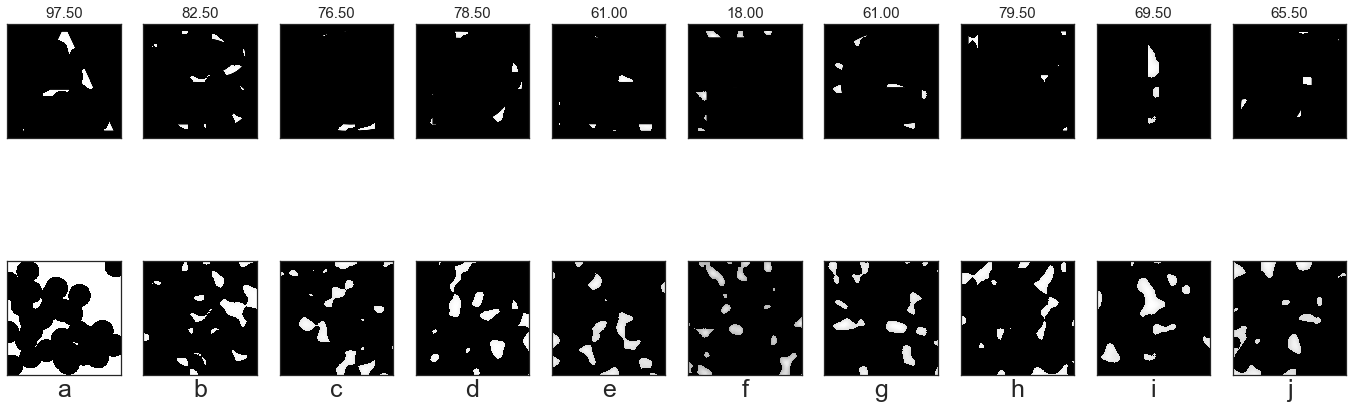

In [186]:
allCharacters = [chr(x) for x in range(ord('a'), ord('j') + 1)] 

# allCharacters = ['a', 'b']
# allCharacters = ['e', 'f']
allNumBubbles = [5, 10]#, 15, 20]
allParticipantIndex = [1, 2]#, 3, 4]

fig, ax = plt.subplots(2, len(allCharacters))
fig.set_size_inches(24, 8)

for column in range(len(allCharacters)):
    character = allCharacters[column]
    correctFilters = []
    allFilters = []
    incorrectFilters = []
    for numBubbles, participantIndex in zip(allNumBubbles, allParticipantIndex):
        # locate all trials for this character
        df = prepareDataframeForParticipant(participantIndex, numBubbles)
        allTrialsForCharacter = df.loc[df['Correct'] == character]

        # prepare list of correct and incorrect stim
        allStim = list(range(100))
        incorrectStim = [int(x) for x in list(allTrialsForCharacter['FilePath'])]
        correctStim = [x for x in allStim if x not in incorrectStim]

        # build correct plane
        for index in correctStim:
            filterPath = 'english_new_stim/{}/{}/filter/{}.png'.format(str(numBubbles), character.upper(), index)
            correctFilters.append(loadImage(filterPath))

        # build totalPlane
        for index in allStim:
            filterPath = 'english_new_stim/{}/{}/filter/{}.png'.format(str(numBubbles), character.upper(), index)
            allFilters.append(loadImage(filterPath))

        # incorrectPlane
        for index in incorrectStim:
            filterPath = 'english_new_stim/{}/{}/filter/{}.png'.format(str(numBubbles), character.upper(), index)
            incorrectFilters.append(loadImage(filterPath))
        
        
    incorrectPlane = np.sum(incorrectFilters, axis=0)
    correctPlane = np.sum(correctFilters, axis=0)
    totalPlane = np.sum(np.array(allFilters), axis=0)
    proportionPlane = np.divide(correctPlane, totalPlane)
    accuracy = len(correctFilters)/len(allFilters)
    print("number of images in all filters: ", len(allFilters))

    clipped = proportionPlane.copy()
#     clippingThreshold = getConfidenceIntervalThreshold(proportionPlane, 0.99)
    clipped[clipped[:, :] < np.quantile(proportionPlane, 0.9)] = 0
#     clipped[clipped[:, :] < clippingThreshold] = 0
    originalImagePath = "/Users/nishadsinghi/chetan_sir/finalStim100Each/{}.png".format(character)
    originalImage = Image.open(originalImagePath)
    originalImageResized = originalImage.resize((224, 224), resample = PIL.Image.LANCZOS)
    final = np.multiply(clipped,originalImageResized)
    
    ax[0][column].tick_params(axis='both', which='both', bottom=False, top=False, labelbottom=False, labelleft=False)
    ax[1][column].tick_params(axis='both', which='both', bottom=False, top=False, labelbottom=False, labelleft=False)
    ax[0][column].set_title("%.2f"%(accuracy*100), fontsize=15)
    ax[0][column].imshow(final, cmap='gray')
    ax[1][column].imshow(clipped, cmap='gray')
    ax[1][column].set_xlabel(character, fontsize=25)

    
plt.savefig('human_english_P1_P2_90Percentile.png')


#     clipped_img = Image.fromarray(clipped * 255)
#     if clipped_img.mode != 'RGB':
#         clipped_img = clipped_img.convert('RGB')
#     clipped_img.save("diagnostic/{}_filter.png".format(alphabet))
#     final_img = Image.fromarray(final)
#     if final_img.mode != 'RGB':
#         final_img = final_img.convert('RGB')
#     final_img.save("diagnostic/{}.png".format(alphabet))

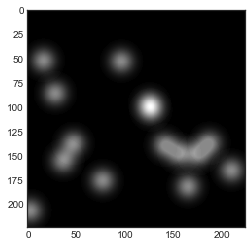

In [129]:
plt.imshow(incorrectPlane, cmap='gray')